<a href="https://colab.research.google.com/github/kavyabalaguru/vyakya-assignment/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
uploaded =files.upload()

Saving books.csv to books (1).csv


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books=pd.read_csv("books.csv",error_bad_lines=False)
books

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


**CHECKING DATATYPES AND DATAS WITH MISSING VALUES**

In [155]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  publish_year        11123 non-null  int64  
 13  publish_month       11123 non-null  int64  
 14  publish_day         11123 non-null  int64  
 15  freq                12 non-null     float64
dtypes: f

In [154]:
#removing the space before the column name "num_pages"
books.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [31]:
# Type of languages 
list_of_lang = books['language_code'].unique()
print(list_of_lang)

['eng' 'fre' 'spa' 'mul' 'grc' 'enm' 'ger' 'jpn' 'ara' 'nl' 'zho' 'lat'
 'por' 'srp' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor' 'tur' 'gla' 'ale']


In [33]:
#converting other forms of english language to "eng"
books.replace(to_replace=('en-US', 'en-GB', 'en-CA'), value='eng',inplace=True)
books['language_code'].value_counts()

eng    10537
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
srp        1
msa        1
nl         1
ara        1
gla        1
glg        1
nor        1
tur        1
wel        1
ale        1
Name: language_code, dtype: int64

**FINDING DUPLICATES**

In [54]:
dup_books=books['title'].value_counts()[:10]
dup_books

The Brothers Karamazov        9
The Iliad                     9
'Salem's Lot                  8
Gulliver's Travels            8
The Odyssey                   8
Anna Karenina                 8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Secret Garden             6
The Great Gatsby              6
Name: title, dtype: int64

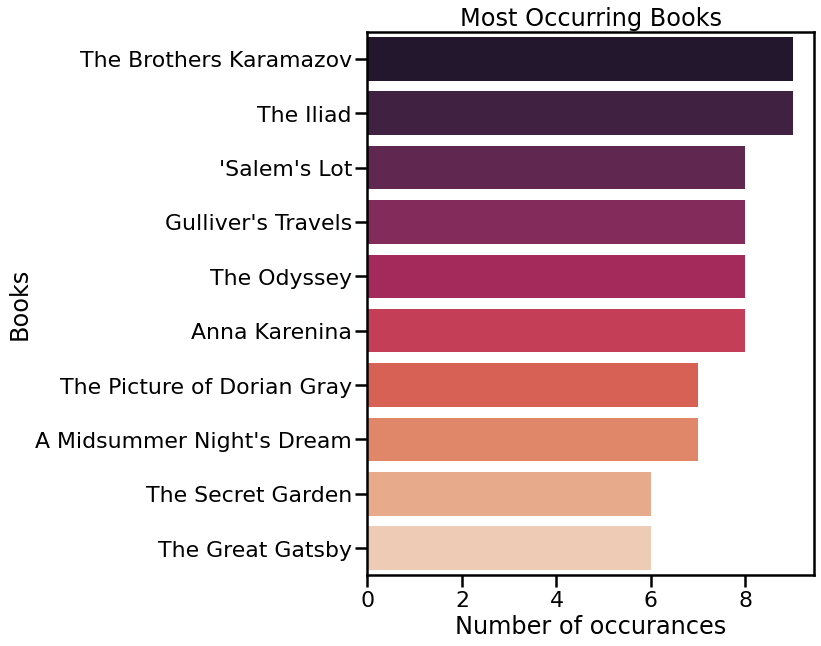

In [207]:
sns.set_context('poster')
plt.figure(figsize=(8,10))
book = df['title'].value_counts()[:10]
sns.barplot(x = book, y = book.index, palette='rocket')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

In [70]:
books[books.duplicated(subset=['isbn13'],keep=False)] # the result shows there is no duplicate books with empty df 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publish_year,publish_month,publish_day


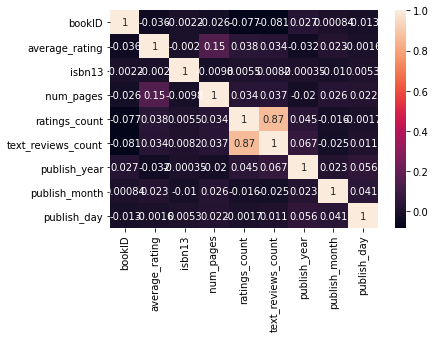

In [81]:
import seaborn as sns
corr=books.corr(method='pearson')
sns.heatmap(data=corr, annot=True)

In [71]:
#splitting year,month,day
books['publish_year'] = books['publication_date'].str.split('/').apply(lambda x: x[2]).astype(int)
books['publish_month'] = books['publication_date'].str.split('/').apply(lambda x: x[0]).astype(int)
books['publish_day'] = books['publication_date'].str.split('/').apply(lambda x: x[1]).astype(int)

In [102]:
# draw lineplot
freq=books['publish_month'].value_counts()
freq

9     1278
10    1212
1     1057
4      991
5      922
6      880
8      853
11     847
3      832
7      786
2      742
12     723
Name: publish_month, dtype: int64

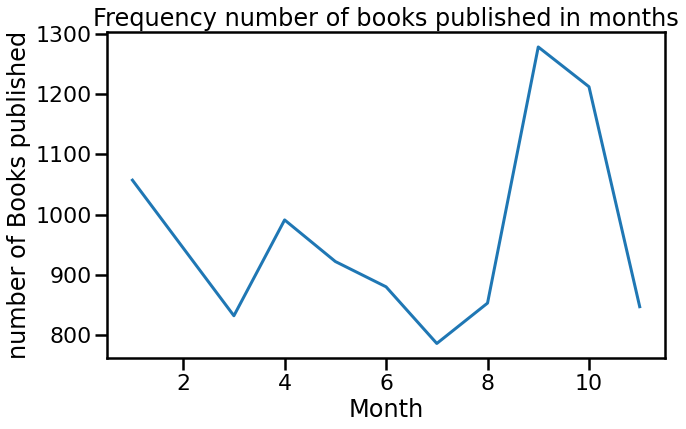

In [135]:
plt.figure(figsize=(10,6))
book = books['publish_month'].value_counts()[:10]
sns.lineplot(x = book.index, y = book, palette='rocket')
plt.title("Frequency number of books published in months")
plt.xlabel("Month")
plt.ylabel("number of Books published")
plt.show()

In [103]:
freq=books['publish_day'].value_counts()
freq

1     3501
15     476
5      373
30     361
3      340
28     338
17     327
6      327
2      317
7      300
12     280
4      277
25     268
31     268
27     264
26     260
10     250
8      223
29     209
14     203
13     198
24     197
9      194
11     188
23     181
21     180
20     178
16     173
18     167
19     153
22     152
Name: publish_day, dtype: int64

In [104]:
freq=books['publish_year'].value_counts()
freq

2006    1700
2005    1260
2004    1069
2003     931
2002     798
        ... 
1900       1
1914       1
1922       1
2020       1
1928       1
Name: publish_year, Length: 87, dtype: int64

In [137]:
#which author wrote many books
import plotly.express as px
plot_data = pd.DataFrame() 
plot_data['authors'] = books.authors.value_counts()
plot_data = plot_data.sort_index(ascending=True)
plot_data = plot_data.nlargest(5, 'authors')
fig = px.bar(plot_data, x=plot_data.index, y=plot_data['authors'], color='authors', labels={'index': "Author's name", 'authors': 'Number of books written'})

# Update yaxis properties
fig.update_yaxes(title_text='Number of books written', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text="Author's name", row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=850, height=600,
    title_font=dict(size=25, family='Courier'),
    title='Most books written by an author (TOP 5)',
)

fig.show()

In [164]:
#books with no ratings and no reviews
print('There are ' + str(books['ratings_count'].isin([0]).sum()) +' books with 0 ratings.')
print('There are ' + str(books['text_reviews_count'].isin([0]).sum()) +' books with 0 reviews.')

There are 80 books with 0 ratings.
There are 624 books with 0 reviews.


In [141]:
#most reviewed books
plot_data = pd.DataFrame() 
plot_data['most_rated'] = books.groupby('title')['text_reviews_count'].sum().sort_values(ascending=False)
plot_data = plot_data.nlargest(5, 'most_rated')
fig = px.bar(plot_data, x=plot_data.index, y=plot_data['most_rated'], color='most_rated', labels={'title': "Book's name", 'most_rated': 'Number of reviews'})

# Update yaxis properties
fig.update_yaxes(title_text='Number of reviews', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text="Book's name", row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=850, height=750,
    title_font=dict(size=25, family='Courier'),
    title='Most reviewed books (TOP 5)',
)

fig.show()

In [149]:
#most rated books
books.sort_values(by=['ratings_count'], ascending=False).loc[:,('title','average_rating', 'ratings_count')].head(15)

,title,average_rating,ratings_count
10336,Twilight (Twilight #1),3.59,4597666
1697,The Hobbit or There and Back Again,4.27,2530894
1462,The Catcher in the Rye,3.80,2457092
307,Angels & Demons (Robert Langdon #1),3.89,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,4.42,2293963
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,4.36,2128944
2114,Animal Farm,3.93,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690


In [158]:
#longest books
books.sort_values(by=['num_pages'], ascending=False).loc[:,('title', 'num_pages')].head(15)

,title,num_pages
6497,The Complete Aubrey/Maturin Novels (5 Volumes),6576
6802,The Second World War,4736
10906,Remembrance of Things Past (Boxed Set),3400
6,Harry Potter Collection (Harry Potter #1-6),3342
6822,Summa Theologica 5 Vols,3020
7862,Harrison's Principles of Internal Medicine,2751
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,2690
10749,The Sword of Truth Boxed Set I: Wizard's Firs...,2480
6257,The J.R.R. Tolkien Companion and Guide,2264
5614,Study Bible: NIV,2198


In [172]:
#shortest books with highest average ratings
short=books[books['num_pages'] > 0].sort_values('num_pages')
short.sort_values(by=['average_rating'], ascending=False).head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publish_year,publish_month,publish_day,freq
4933,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press,1975,1,1,NaN
8544,32823,Fanning the Flame: Bible Cross and Mission,Chris Green/Chris Wright/Paul Douglas Gardner,5.0,0310249872,9780310249870,eng,336,1,1,6/17/2003,Zondervan,2003,6,17,NaN
5474,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio,1996,4,1,NaN
6184,23276,Taxation of Mineral Rents,Ross Garnaut,5.0,0198284543,9780198284543,eng,350,1,0,11/17/1983,Oxford University Press USA,1983,11,17,NaN
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,3/17/2003,Arcadia Publishing,2003,3,17,NaN


**AUDIO BOOKS**

In [183]:
# Audio books
Audio_books=df[df.publisher.str.contains("Audio")]
Audio_books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,0739322206,9780739322208,eng,6,1266,253,3/23/2005,Random House Audio
40,68,The Known World,Edward P. Jones/Kevin R. Free,3.83,006076273X,9780060762735,en-US,14,55,12,6/15/2004,HarperAudio
215,524,Lord of the Flies,William Golding,3.68,0307281701,9780307281708,eng,6,408,96,10/11/2005,Listening Library (Audio)
370,1281,Men Are from Mars Women Are from Venus,John Gray,3.55,006123205X,9780061232053,eng,2,43,3,4/3/2007,HarperAudio
673,2166,The Old Man and the Sea,Ernest Hemingway/Donald Sutherland,3.77,0743564367,9780743564366,eng,3,393,77,5/1/2006,Simon Schuster Audio
...,...,...,...,...,...,...,...,...,...,...,...,...
10871,44470,The Killer Angels,Michael Shaara/Stephen Hoye,4.32,0739309056,9780739309056,en-US,13,92,37,5/11/2004,Random House Audio Publishing Group
10885,44528,Matilda,Roald Dahl/Rula Lenska/Sian Thomas/Christopher...,4.31,0141805625,9780141805627,eng,1,6,0,3/3/2005,Puffin Audiobooks
10969,44979,Howards End,E.M. Forster/Nadia May,3.96,0786168471,9780786168477,eng,9,32,16,6/1/2007,Blackstone Audiobooks
11077,45472,Treasury of American Tall Tales: Volume 1: Dav...,David Bromberg/Jay Ungar/Molly Mason/Garrison ...,3.86,0739336509,9780739336502,eng,0,36,9,8/22/2006,Listening Library (Audio)


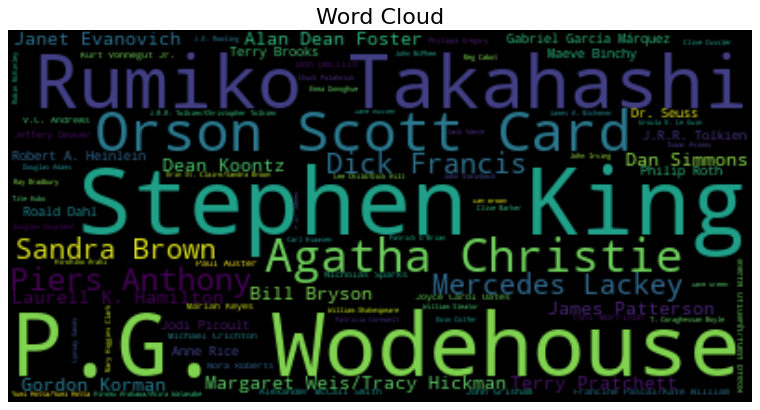

In [185]:
from wordcloud import WordCloud

d = {}
for x, a in zip(books.authors.value_counts(), books.authors.value_counts().index):
    d[a] = x

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud", fontsize=20)
plt.savefig("cloud.png", dpi=200)
plt.show()

In [186]:
new_data=books
new_data.loc[ (new_data['average_rating'] >= 0) & (new_data['average_rating'] <= 1), 'rating_between'] = "between_0_to_1"
new_data.loc[ (new_data['average_rating'] > 1) & (new_data['average_rating'] <= 2), 'rating_between'] = "between_1_to_2"
new_data.loc[ (new_data['average_rating'] > 2) & (new_data['average_rating'] <= 3), 'rating_between'] = "between_2_to_3"
new_data.loc[ (new_data['average_rating'] > 3) & (new_data['average_rating'] <= 4), 'rating_between'] = "between_3_to_4"
new_data.loc[ (new_data['average_rating'] > 4) & (new_data['average_rating'] <= 5), 'rating_between'] = "between_4_to_5"

In [188]:
trial = new_data[['average_rating', 'ratings_count']]
data_model = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T
data_model

array([[4.570000e+00, 2.095690e+06],
       [4.490000e+00, 2.153167e+06],
       [4.420000e+00, 6.333000e+03],
       ...,
       [3.960000e+00, 8.200000e+02],
       [3.720000e+00, 7.690000e+02],
       [3.910000e+00, 1.130000e+02]])

In [189]:
from sklearn.cluster import KMeans
# Elbow Method

score = []
x = data_model
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

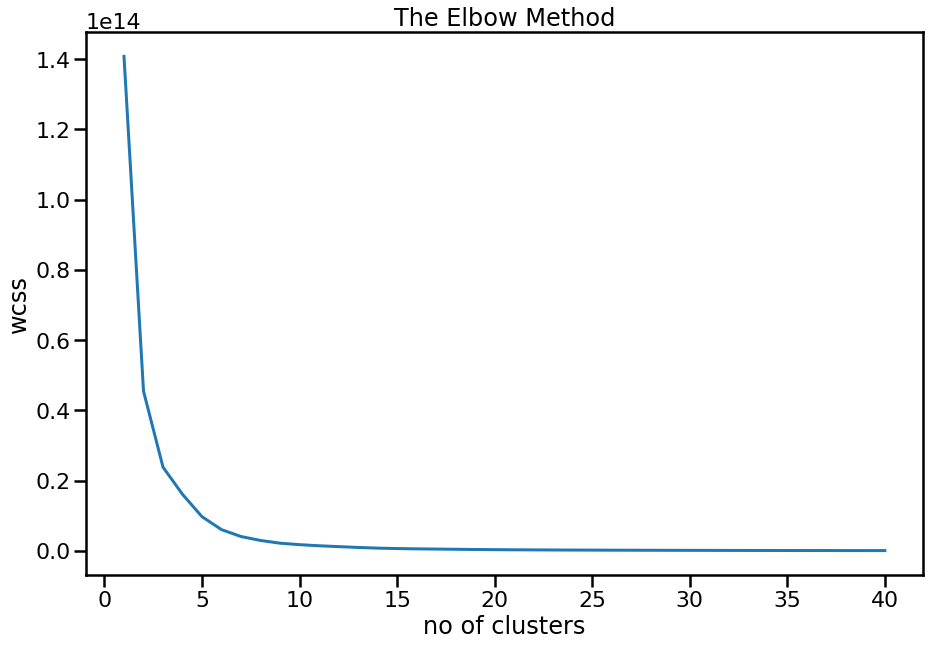

In [201]:
# plotting the score
plt.figure(figsize=(15, 10))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [191]:
rating_between_df = new_data['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [192]:
lang_df = new_data['language_code'].str.get_dummies(sep=",")
lang_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
engine_features = pd.concat([rating_between_df, lang_df, new_data['average_rating'], new_data['ratings_count']], axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.78,41428


In [194]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
engine_features = min_max_scaler.fit_transform(engine_features)

In [198]:
from sklearn import neighbors
engine_model = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
engine_model.fit(engine_features)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [202]:
dist, idlist = engine_model.kneighbors(engine_features)
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = new_data[new_data['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(new_data.loc[newid].title)
    return book_list_name

In [206]:
book_list_name = book_recommendation_engine('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
book_list_name

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'The Hobbit  or There and Back Again',
 'The Book Thief',
 'The Giver (The Giver  #1)',
 'Little Women']